# Цель занятия
На этом занятии мы рассмотрим концепцию регуляризации с помощью наглядного примера.

**Регуляризация** в машинном обучении — это методика, которая помогает снизить переобучение моделей. Переобучение возникает, когда модель слишком хорошо подстраивается под тренировочные данные, что приводит к тому, что она плохо обобщается на новые данные. Регуляризация может быть полезна в многих задачах машинного обучения, особенно в случаях, когда у вас мало тренировочных данных или когда модель имеет очень много параметров.

**Основные методы регуляризации**
Существует несколько основных методов регуляризации в машинном обучении, включая:
- L1-регуляризация (Lasso): добавляет к функции потерь модели сумму абсолютных значений весов, что приводит к разреженности весов и выбору наиболее значимых признаков.
- L2-регуляризация (Ridge): добавляет к функции потерь модели квадрат суммы всех весов, что приводит к сокращению весов и снижению влияния шумовых признаков.
- Elastic Net: комбинация L1-регуляризации и L2-регуляризации, которая помогает учесть преимущества обоих методов и уменьшить их недостатки.
- Dropout: случайным образом исключает некоторые узлы из обучения на каждом шаге, что помогает снизить переобучение и повысить обобщающую способность модели (используется в глубинном обучении).
- Data augmentation: методика, которая заключается в создании новых тренировочных данных путем искажения и изменения исходных данных, что помогает снизить переобучение и увеличить обобщающую способность модели.
- Early stopping: методика, которая заключается в прекращении обучения модели, когда ее производительность на проверочном наборе данных перестает улучшаться, что помогает избежать переобучения и выбрать наилучшую модель.

**Методы регуляризации, основанные на добавлении слагаемого к функции потерь модели**

Давайте подробнее разберем те типы регуляризации, которые работают путем добавления дополнительного слагаемого к функции потерь модели. Существует два основных типа такой регуляризации: L1-регуляризация и L2-регуляризация. L1-регуляризация добавляет к функции потерь модели сумму абсолютных значений всех весов модели, тогда как L2-регуляризация добавляет к функции потерь модели квадрат суммы всех весов модели. Это дополнительное слагаемое, которое называется регуляризатором, заставляет модель предпочитать более простые решения, которые не зависят слишком сильно от конкретных тренировочных данных.
Интуиция за данным действием следующая: большие веса признака свидетельствуют о том, что модель переобучилась. Соответственно, добавление дополнительного слагаемого к функции потерь заставляет модель снижать значение весов признаков.

Мы рассмотрим принцип регуляризации, основанной на добавлении слагаемого к функции потерь модели, с помощью следующего примера: регулируя значения весов при признаках с помощью полиномиальной функции 1, 4, и 8 степени мы увидим, как обобщаются или не обобщаются данные.

# Используемые библиотеки

**numpy**

**matplotlib**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.rc("lines", linewidth=2)

In [2]:
# координаты точек для задачи
dots = [
    (-1.9890582839332023, -0.8454478591739265),
    (-1.933724649177508, -0.9816537293417895),
    (-1.7634673114676798, -0.9986794631127724),
    (-1.6102357075288345, -0.9092943608151123),
    (-1.3633625678495835, -0.913550794257858),
    (-1.1633101960405354, -0.8113963916319606),
    (-1.0271043258726729, -0.9816537293417895),
    (-0.12474043601058332, 0.06542889757365777),
    (0.10510696989768475, 0.35060993823762104),
    (0.3945444440043927, 0.32507133758114676),
    (0.6882383515538464, 0.7762532825121932),
]

In [3]:
# создание списков координат в формате, требуемом для matplotlib
x_coords = []
y_coords = []
for el in dots:
    x_coords.append(el[0])
    y_coords.append(el[1])

In [4]:
degs = [1, 4, 7]

degs_dict = {}

for deg in degs:
    # Находим коэффициенты полинома deg степени, который проходит через наши точки
    coefficients = np.polyfit(x_coords, y_coords, deg=deg)

    # # Создаем новый массив x, через которые мы хотим построить линию
    new_x_coords = np.linspace(-2, 1, 100)

    # Находим соответствующие y-координаты для новых значений x с помощью polyval
    new_y_coords = np.polyval(coefficients, new_x_coords)

    degs_dict[deg] = {"new_x_coords": new_x_coords, "new_y_coords": new_y_coords}

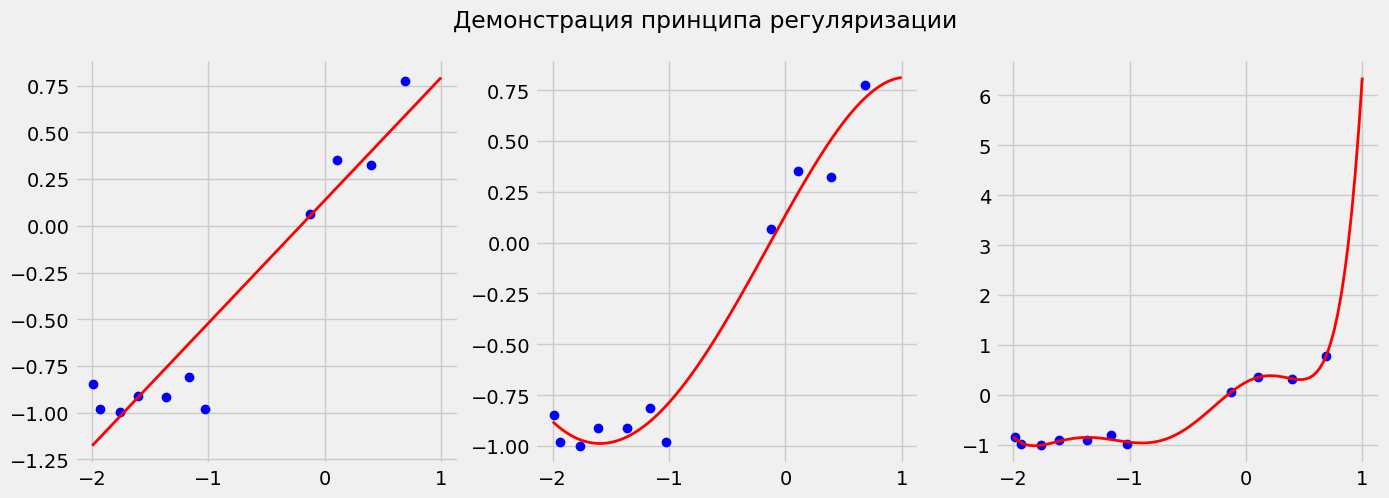

In [5]:
# Создание графиков
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axs[0].plot(x_coords, y_coords, "bo")
axs[0].plot(degs_dict[1]["new_x_coords"], degs_dict[1]["new_y_coords"], "r")

axs[1].plot(x_coords, y_coords, "bo")
axs[1].plot(degs_dict[4]["new_x_coords"], degs_dict[4]["new_y_coords"], "r")

axs[2].plot(x_coords, y_coords, "bo")
axs[2].plot(degs_dict[7]["new_x_coords"], degs_dict[7]["new_y_coords"], "r")

# Настройка общего заголовка
fig.suptitle("Демонстрация принципа регуляризации")

# Отображение графиков
plt.show()